# Principal Component Analysis with Cancer Data

In [136]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [137]:
df = pd.read_csv('breast-cancer-wisconsin-data.csv')
df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [138]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

In [139]:
#dropping id column and class (column which is the target )
df = df.drop('ID',axis=1,)
target = df.Class
X = df.drop('Class',axis=1)
X.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [140]:
X.dtypes ##All columns are numeric except Bare Nuclei

ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
dtype: object

In [141]:
X.shape # data frame have 699 records and 9 dimension 

(699, 9)

In [142]:
#Descriptive Analysis
X.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ClumpThickness,699,NaN,NaN,NaN,4.41774,2.81574,1,2,4,6,10
Cell Size,699,NaN,NaN,NaN,3.13448,3.05146,1,1,1,5,10
Cell Shape,699,NaN,NaN,NaN,3.20744,2.97191,1,1,1,5,10
Marginal Adhesion,699,NaN,NaN,NaN,2.80687,2.85538,1,1,1,4,10
Single Epithelial Cell Size,699,NaN,NaN,NaN,3.21602,2.2143,1,2,2,4,10
Bare Nuclei,699,11,1,402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Normal Nucleoli,699,NaN,NaN,NaN,3.43777,2.43836,1,2,3,5,10
Bland Chromatin,699,NaN,NaN,NaN,2.86695,3.05363,1,1,1,4,10
Mitoses,699,NaN,NaN,NaN,1.58941,1.71508,1,1,1,1,10


In [143]:
#All columns except Bare Nuclei are interpreted as numerical fields
#All columns are scaled in range 1-10

In [144]:
X.count()

ClumpThickness                 699
Cell Size                      699
Cell Shape                     699
Marginal Adhesion              699
Single Epithelial Cell Size    699
Bare Nuclei                    699
Normal Nucleoli                699
Bland Chromatin                699
Mitoses                        699
dtype: int64

In [145]:
X.isnull().sum()

ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
dtype: int64

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [146]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column
print("Nan values in data frame: \n",X.isna().sum())

#Inference:- 
#we see there are no missing values in the dataset

Nan values in data frame: 
 ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
dtype: int64


In [147]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
X['Bare Nuclei']=X['Bare Nuclei'].replace("?",value="Nan")
X["Bare Nuclei"] = X["Bare Nuclei"].astype('float',inplace=True) # converting from object to float for Bare Nuclie.
X.describe()

#Inferences
# Most of the features have right skewed distribution as 50% of data distribution is around 1- 4 which is less than mean

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
count,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [148]:
print("Nan values in data frame: \n",df.isna().sum())
#Inference-: 16 values were corrupted (They had ? and are changed to Nan)

Nan values in data frame: 
 ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64


In [149]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values
X['Bare Nuclei'].fillna(X['Bare Nuclei'].median(),inplace=True)
X['Bare Nuclei'] = X['Bare Nuclei'].astype('float64',inplace=True)
X.isna().sum()

#Inference:-
# 1. Imputing all the ? values in bare nuclei with the median of this column. 

ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
dtype: int64

In [150]:
X.dtypes ##Bare Nuclei chnged to float

ClumpThickness                   int64
Cell Size                        int64
Cell Shape                       int64
Marginal Adhesion                int64
Single Epithelial Cell Size      int64
Bare Nuclei                    float64
Normal Nucleoli                  int64
Bland Chromatin                  int64
Mitoses                          int64
dtype: object

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


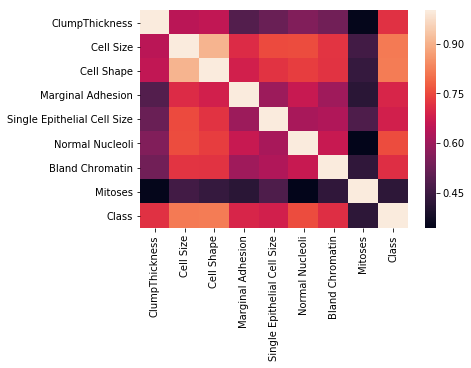

In [151]:
# Check for correlation of variable
sns.heatmap(df.corr())

In [152]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

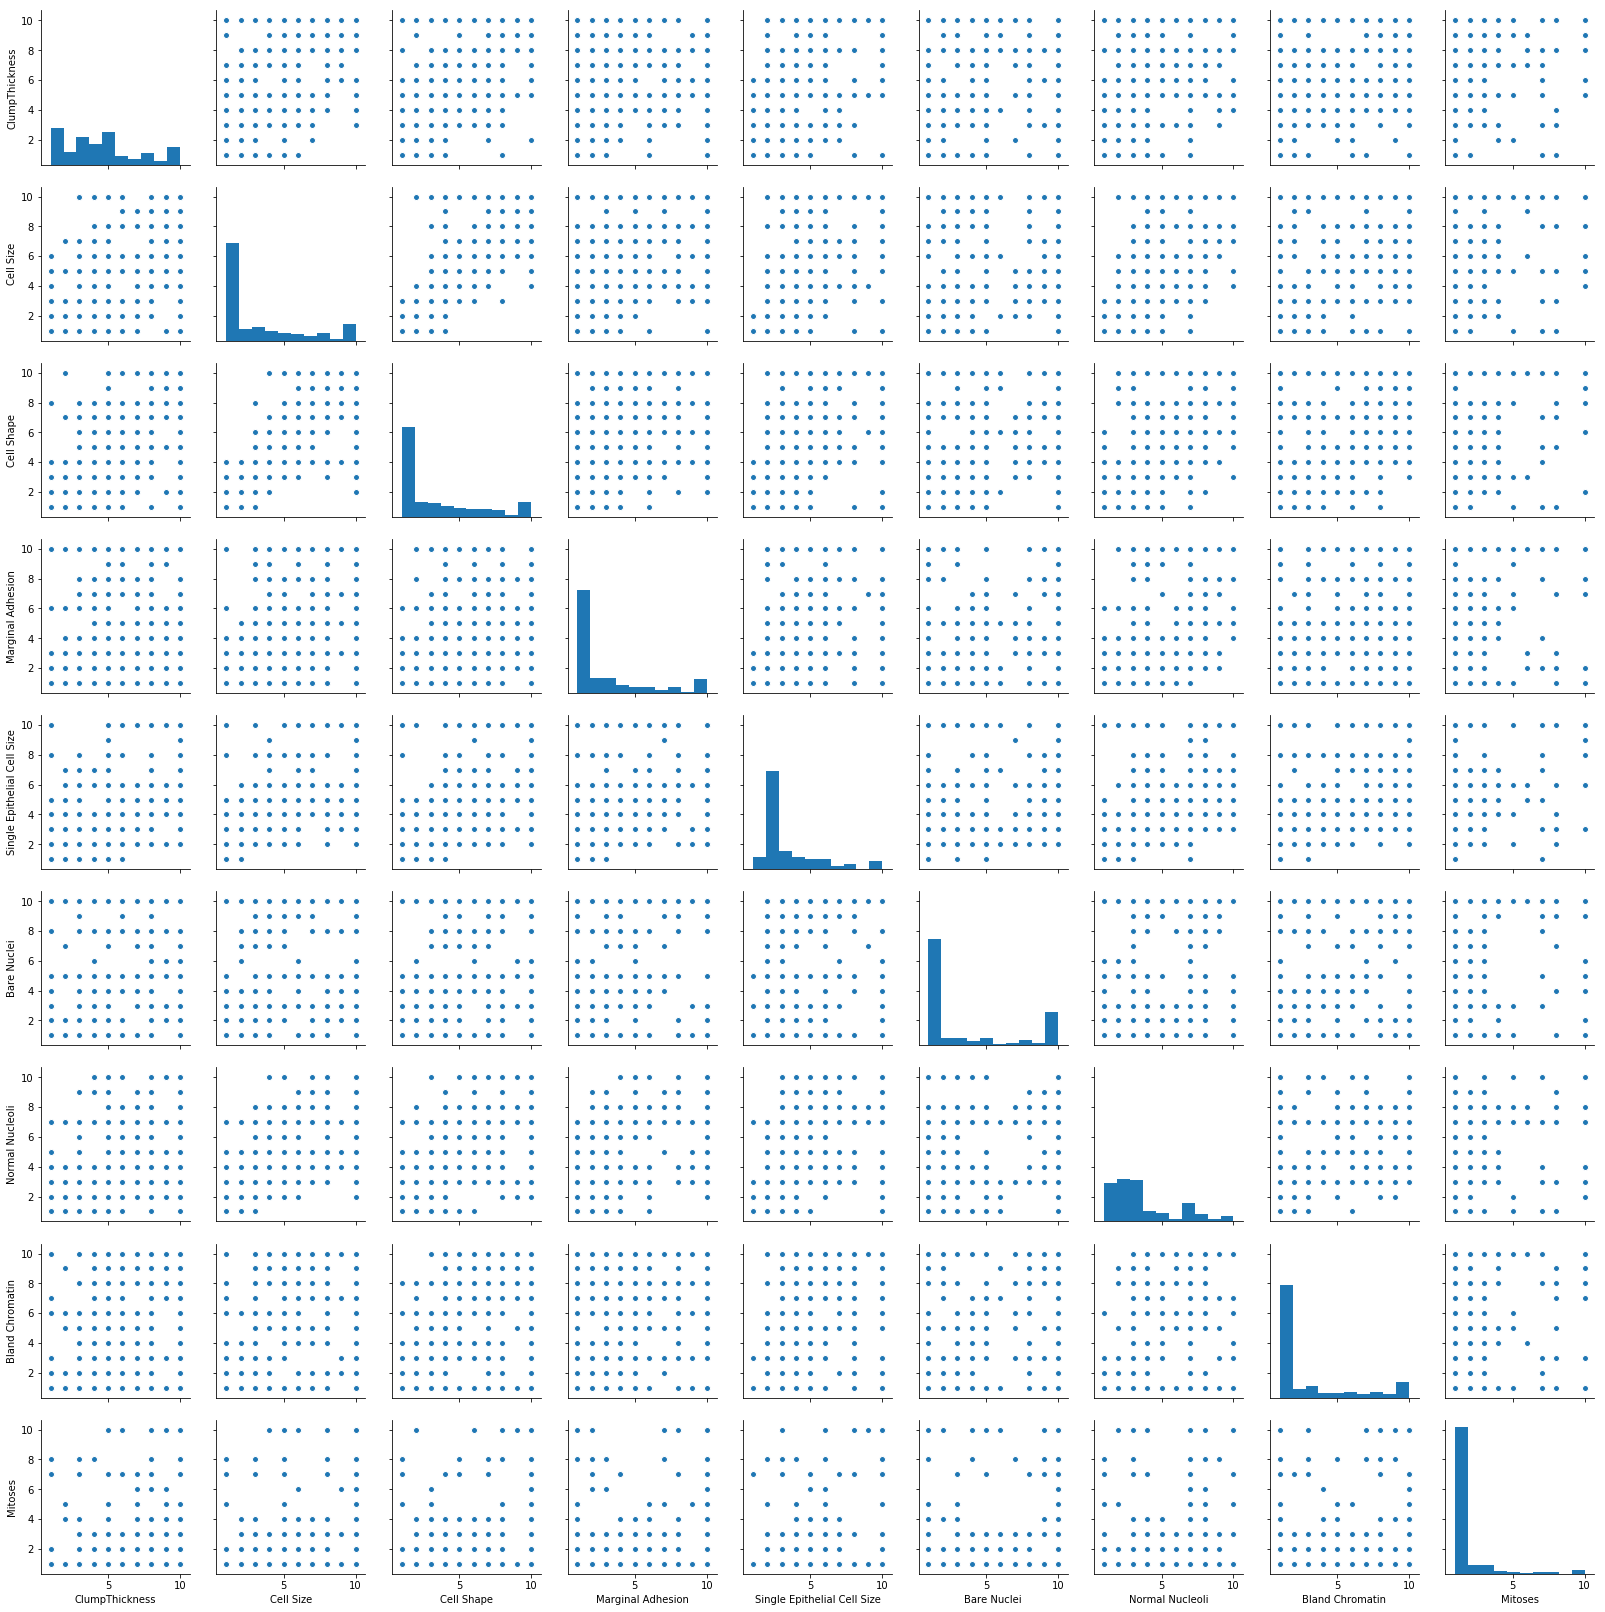

In [153]:
#Let us check for pair plots
sns.pairplot(X)

In [154]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

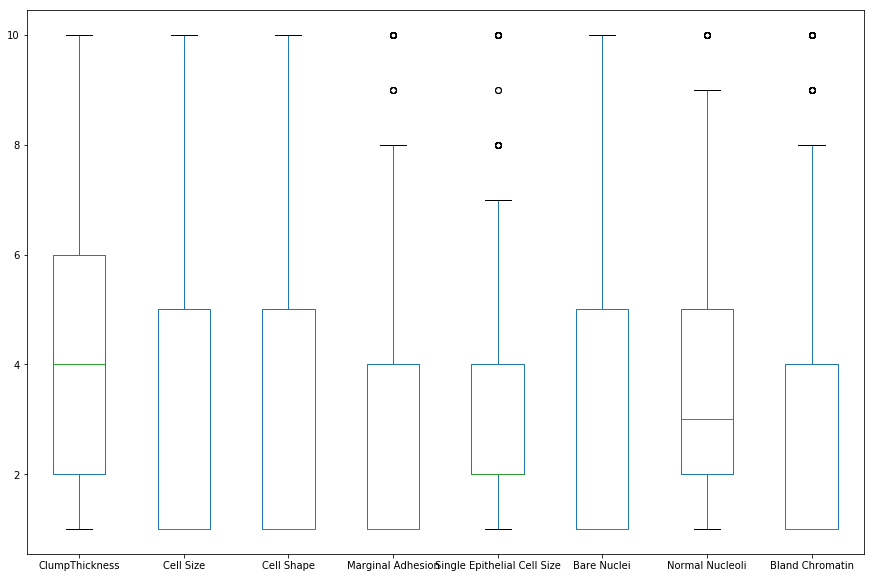

In [155]:
#we observe that mitoses column is having lot of outliers and it has no significance in clustering hence we can remove that column
X.drop('Mitoses',axis=1,inplace=True)
X.plot(kind='box',figsize=(15,10))
plt.show()
#we see still some columns are having outliers

In [156]:
#Handling outliers
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
X = X[~((X < (Q1 - 1.5 * IQR)) |(X > (Q3 + 1.5 * IQR))).any(axis=1)]  
print("Shape of dataset after removing outliers",X.shape)

Shape of dataset after removing outliers (553, 8)


In [157]:
#Scaling the data using standard Scaler
sc = StandardScaler()
X_std =  sc.fit_transform(X)    

# Q6 Create a covariance matrix for identifying Principal components

In [158]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00181159 0.59639556 0.60326466 0.4402668  0.44981463 0.55986268
  0.47016367 0.49498089]
 [0.59639556 1.00181159 0.893112   0.66982407 0.66467968 0.72912303
  0.66007869 0.68197162]
 [0.60326466 0.893112   1.00181159 0.62424029 0.6450607  0.72642953
  0.63461433 0.64273826]
 [0.4402668  0.66982407 0.62424029 1.00181159 0.56396021 0.67476094
  0.56347097 0.56355895]
 [0.44981463 0.66467968 0.6450607  0.56396021 1.00181159 0.64584881
  0.54220859 0.58400942]
 [0.55986268 0.72912303 0.72642953 0.67476094 0.64584881 1.00181159
  0.66225186 0.58593732]
 [0.47016367 0.66007869 0.63461433 0.56347097 0.54220859 0.66225186
  1.00181159 0.59888235]
 [0.49498089 0.68197162 0.64273826 0.56355895 0.58400942 0.58593732
  0.59888235 1.00181159]]


# Q7 Identify eigen values and eigen vector

In [159]:
# Step 2- Get eigen values and eigen vector

In [160]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors :\n', eigenvectors)
print('\n Eigen Values :\n', eigenvalues)

Eigen Vectors :
 [[-0.30276636 -0.01034921 -0.8653944   0.14079189  0.3549673   0.04392633
   0.09183056  0.05595933]
 [-0.39516679 -0.73716629 -0.04443358  0.12955865 -0.52042077  0.03722205
   0.04350488 -0.08691005]
 [-0.38689723  0.66706234 -0.11470185  0.049053   -0.60849833 -0.04770195
   0.0812186  -0.10311891]
 [-0.33927256  0.07409413  0.35172048  0.29952913  0.21055593  0.52826164
   0.45160453  0.37234175]
 [-0.33883788  0.01559725  0.26561509  0.22176311  0.37012618 -0.37087289
   0.20295635 -0.67043567]
 [-0.37293178 -0.05255205  0.07502526 -0.81559627  0.11518797 -0.24200153
   0.25694091  0.22244655]
 [-0.34116818  0.02677965  0.17096324  0.30101085  0.11954513 -0.4690848
  -0.51976733  0.50848943]
 [-0.34219213  0.04790108  0.08273928 -0.257458    0.15493135  0.54698918
  -0.63384807 -0.28725486]]

 Eigen Values :
 [5.32671697 0.10430268 0.6066487  0.26278344 0.37952912 0.40738701
 0.46598642 0.46113841]


# Q8 Find variance and cumulative variance by each eigen vector

In [161]:
tot = sum(eigenvalues)
print("Total eigen values",tot)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%

Total eigen values 8.014492753623193


In [162]:
print("Explained variance by each eigen vecotor :",var_explained)

Explained variance by each eigen vecotor : [0.6646355718615221, 0.07569396086981149, 0.0581429715561633, 0.057538065526104756, 0.05083129106966322, 0.04735535103049407, 0.03278852995020861, 0.013014258136032424]


In [163]:
print("Explained cumulative variance by each eigen vecotor :",cum_var_exp)

Explained cumulative variance by each eigen vecotor : [0.66463557 0.74032953 0.7984725  0.85601057 0.90684186 0.95419721
 0.98698574 1.        ]


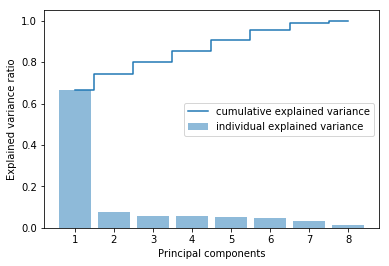

In [164]:
plt.bar(range(1,9), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,9),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [165]:
# We observe that first 6 components are explaining 96% of variance and remaining 2 components are not significant
# hence we use n_components of n=6

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [166]:
from sklearn.decomposition import PCA
X_centered = X - X.mean(axis=0)
pca = PCA(n_components=6)
pca.fit(X_centered)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [167]:
#transforming the data using principal components
X_pca = pca.transform(X_centered)

# Q10 Find correlation between components and features

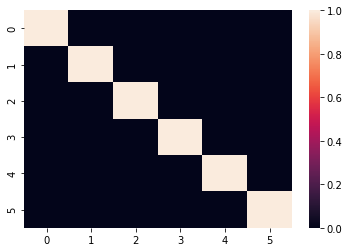

In [168]:
# Check for correlation of components
sns.heatmap(pd.DataFrame(X_pca).corr())

In [169]:
# From the about correlation matrix or heatmap we see that there is no correlation among features.

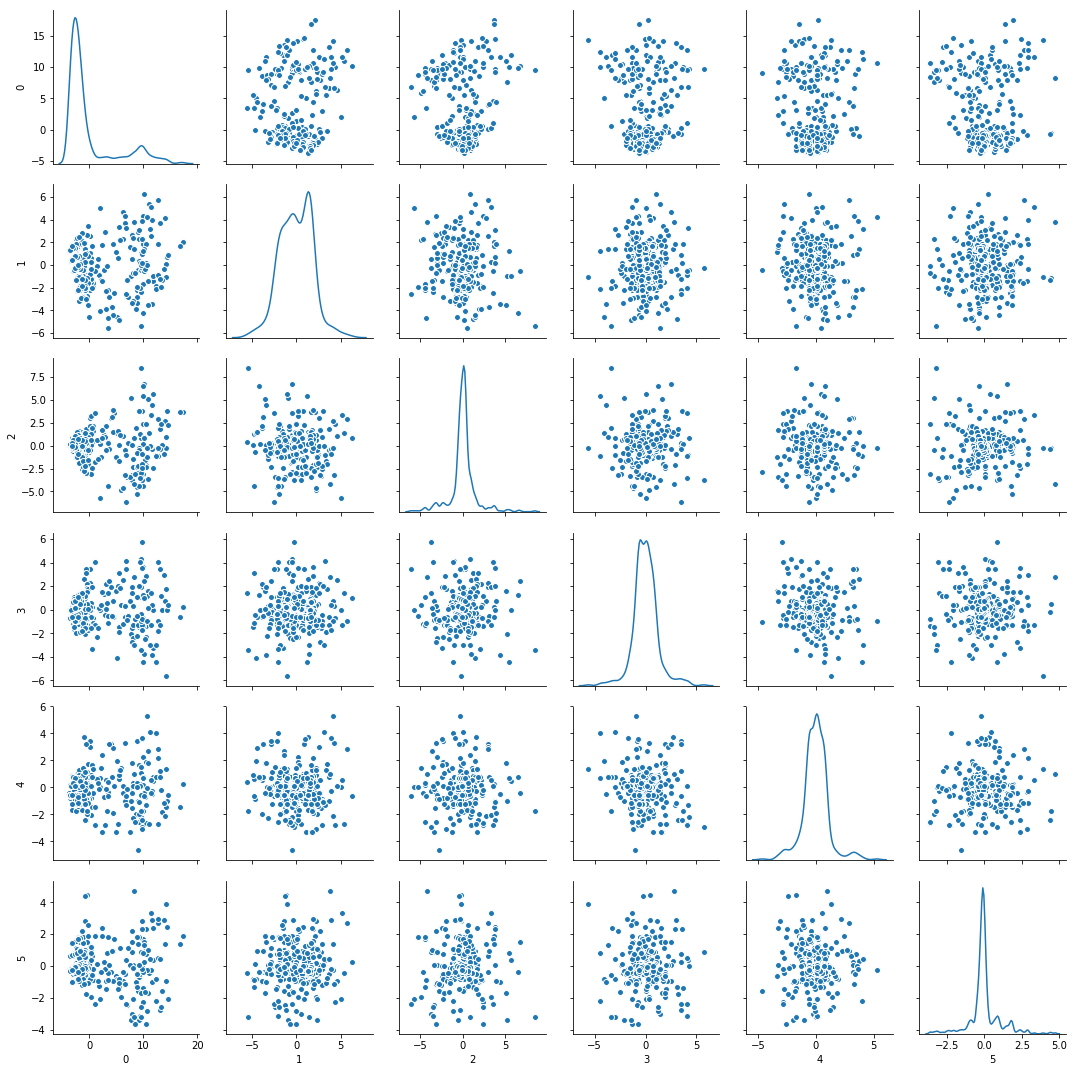

In [170]:
#Visualising correlation with pari plots
sns.pairplot(pd.DataFrame(X_pca), diag_kind='kde') 